In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [2]:
df = pd.read_csv('/content/rain.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            56 non-null     int64  
 1   District        56 non-null     object 
 2   January R/F     49 non-null     float64
 3   January %DEP    49 non-null     float64
 4   February R/F    49 non-null     float64
 5   February %DEP   49 non-null     float64
 6   March R/F       49 non-null     float64
 7   March %DEP      49 non-null     float64
 8   April R/F       49 non-null     float64
 9   April %DEP      49 non-null     float64
 10  May R/F         51 non-null     float64
 11  May %DEP        51 non-null     float64
 12  June R/F        51 non-null     float64
 13  June %DEP       51 non-null     float64
 14  July R/F        52 non-null     float64
 15  July %DEP       52 non-null     float64
 16  August R/F      52 non-null     float64
 17  August %DEP     52 non-null     float

In [3]:
df = df.groupby('District').apply(lambda group: group.fillna(group.mean()))
df.head(50)

Year  January R/F  January %DEP  February R/F  February %DEP  \
District                                                                    
East     0   2009     5.700000    -87.000000      4.200000     -95.000000   
         1   2010     5.700000    -87.000000     18.000000     -78.000000   
         2   2011    21.600000    -36.000000     40.500000     -28.000000   
         3   2012    17.800000    -47.000000     21.500000     -62.000000   
         4   2013     4.300000    -87.000000     32.100000     -43.000000   
         5   2014     0.000000   -100.000000      5.400000     -90.000000   
         6   2015     7.400000    -78.000000     17.400000     -69.000000   
         7   2016    15.200000    -55.000000      7.400000     -87.000000   
         8   2017     7.700000    -77.000000      9.000000     -84.000000   
         9   2018     0.600000    -98.000000     24.900000     -56.000000   
         10  2019     2.100000    -92.000000     49.200000       2.000000   
         11  2020    39.900000     60.000000     29.500000     -39.000000   
         12  2021    16.000000    -36.000000     21.900000     -54.000000   
         13  2022    13.100000    -24.000000     52.600000      52.000000   
North    28  2009    40.866667    -19.666667     58.816667     -38.916667   
         29  2010    40.866667    -19.666667     58.816667     -38.916667   
         30  2011    31.800000    -48.000000     72.400000     -26.000000   
         31  2012    96.400000     56.000000     39.500000     -60.000000   
         32  2013     9.600000    -84.000000     62.800000     -36.000000   
         33  2014     0.000000   -100.000000     29.800000     -70.000000   
         34  2015    22.000000    -64.000000     34.000000     -65.000000   
         35  2016    81.800000     33.000000     34.900000     -65.000000   
         36  2017     7.700000    -77.000000      9.000000     -84.000000   
         37  2018    15.200000    -75.000000     66.400000     -33.000000   
         38  2019    25.700000    -37.000000     92.700000       3.000000   
         39  2020    83.100000    104.000000     25.200000     -72.000000   
         40  2021    31.900000    -22.000000     64.500000     -28.000000   
         41  2022    85.200000     78.000000    174.600000      69.000000   
South    42  2009     7.266667    -76.666667     18.125000     -60.333333   
         43  2010     7.266667    -76.666667     18.125000     -60.333333   
         44  2011    11.500000    -66.000000      5.400000     -90.000000   
         45  2012    10.100000    -70.000000      3.600000     -94.000000   
         46  2013     4.000000    -88.000000     25.700000     -54.000000   
         47  2014     0.000000   -100.000000      5.600000     -90.000000   
         48  2015     2.400000    -93.000000      9.200000     -84.000000   
         49  2016    15.200000    -55.000000      2.100000     -96.000000   
         50  2017     5.600000    -83.000000      0.000000    -100.000000   
         51  2018     2.900000    -91.000000     14.500000     -74.000000   
         52  2019     5.600000    -85.000000     58.300000     -24.000000   
         53  2020    21.900000    -40.000000     31.600000     -59.000000   
         54  2021     2.600000    -93.000000     14.400000     -81.000000   
         55  2022     5.400000    -56.000000     47.100000     122.000000   
West     14  2009    14.590909    -72.363636     34.909091     -49.909091   
         15  2010    14.590909    -72.363636     34.909091     -49.909091   
         16  2011    14.590909    -72.363636     34.909091     -49.909091   
         17  2012    16.000000    -74.000000      5.000000     -95.000000   
         18  2013     8.000000    -87.000000     43.000000     -56.000000   
         19  2014     0.000000   -100.000000      1.300000     -99.000000   
         20  2015     7.000000    -89.000000     23.500000     -76.000000   
         21  2016    11.200000    -82.000000      4.500000     -95.000000   

        

In [4]:
df = df.reset_index()

rainfall_columns = [col for col in df.columns if 'R/F' in col]
df = df[['Year', 'District'] + rainfall_columns]

df_long = pd.melt(df, id_vars=['Year', 'District'], var_name='Month', value_name='Rainfall')

df_long['Month'] = df_long['Month'].str.extract(r'(\w+)\sR/F')
df_long['Rainfall'] = df_long['Rainfall'].astype(float).round(2)
print(df_long.head(10))
df_long.info()

   Year District    Month  Rainfall
0  2009     East  January       5.7
1  2010     East  January       5.7
2  2011     East  January      21.6
3  2012     East  January      17.8
4  2013     East  January       4.3
5  2014     East  January       0.0
6  2015     East  January       7.4
7  2016     East  January      15.2
8  2017     East  January       7.7
9  2018     East  January       0.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      672 non-null    int64  
 1   District  672 non-null    object 
 2   Month     672 non-null    object 
 3   Rainfall  672 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 21.1+ KB


In [5]:
district_map = {'East': 0, 'West': 1, 'North': 2, 'South': 3}
df_long['District'] = df_long['District'].replace(district_map)

month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_long['Month'] = df_long['Month'].map(month_map)

df_long['Month_sin'] = np.sin(2 * np.pi * df_long['Month'] / 12)
df_long['Month_cos'] = np.cos(2 * np.pi * df_long['Month'] / 12)
df_long.head()
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       672 non-null    int64  
 1   District   672 non-null    int64  
 2   Month      672 non-null    int64  
 3   Rainfall   672 non-null    float64
 4   Month_sin  672 non-null    float64
 5   Month_cos  672 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 31.6 KB


In [6]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

df_long['Outlier'] = detect_outliers_iqr(df_long['Rainfall'])

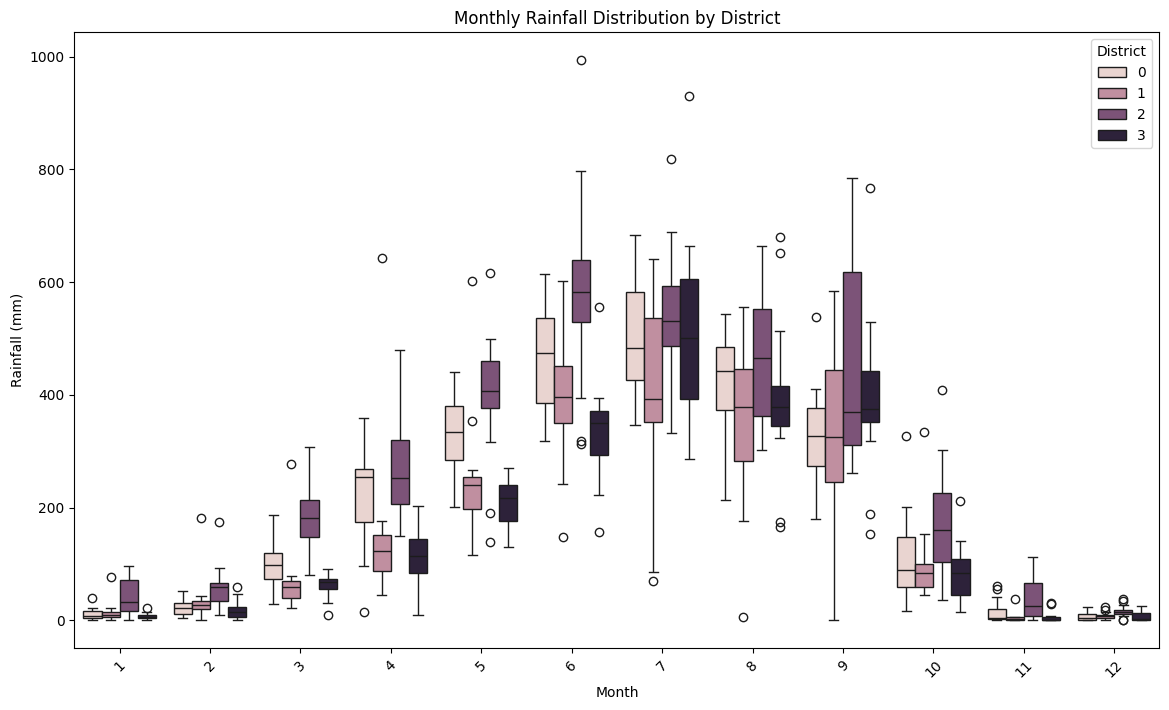

In [7]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_long, x='Month', y='Rainfall', hue='District')
plt.title('Monthly Rainfall Distribution by District')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.legend(title='District')
plt.show()


In [8]:
#Handling Outliers with mean
median_rainfall = df_long[~df_long['Outlier']]['Rainfall'].mean()
df_long['Rainfall'] = df_long['Rainfall'].mask(df_long['Outlier'], median_rainfall)

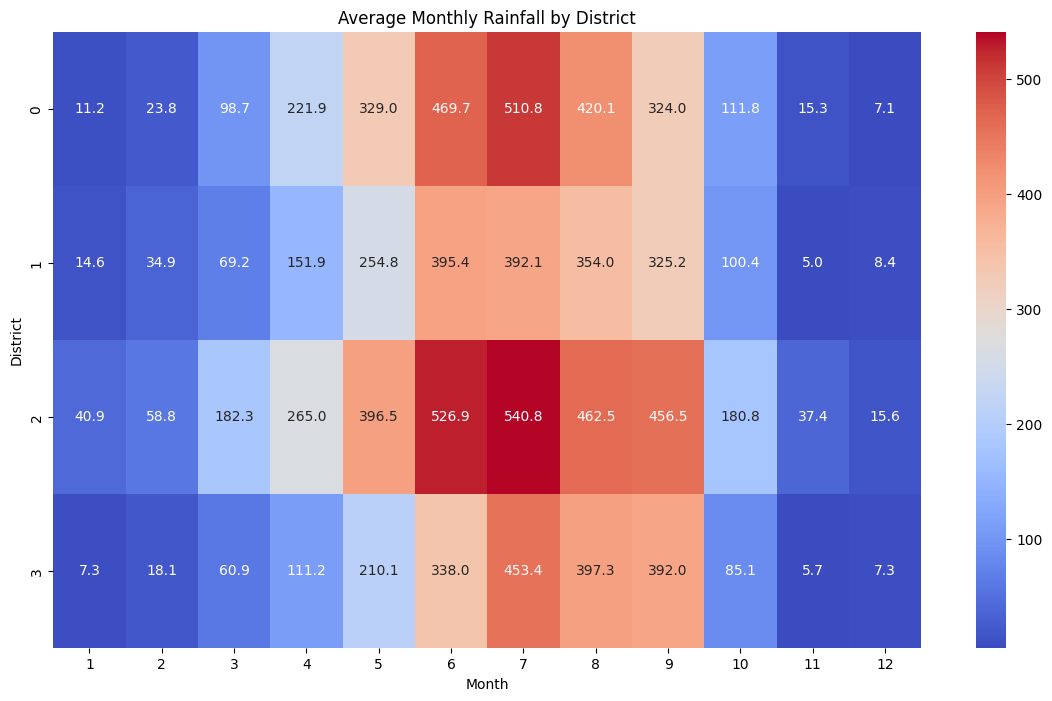

In [9]:
# Pivot the data for Rainfall intensity
df_pivot = df_long.pivot_table(index='District', columns='Month', values='Rainfall', aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Average Monthly Rainfall by District')
plt.xlabel('Month')
plt.ylabel('District')
plt.show()


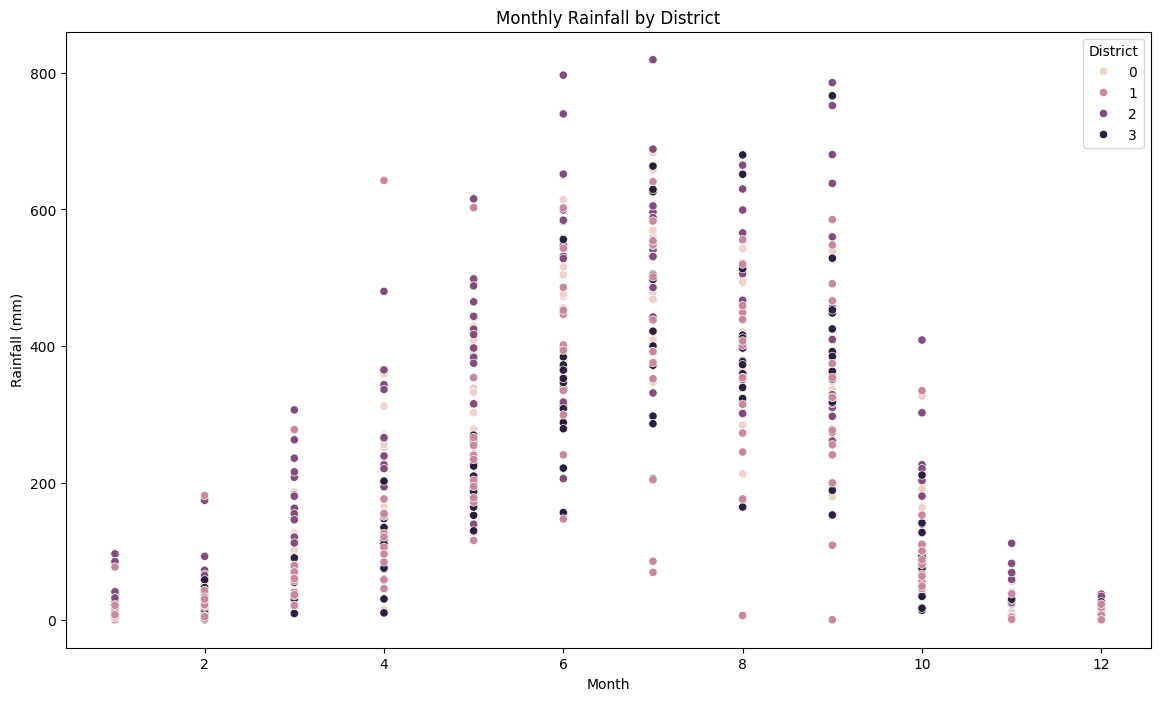

In [10]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_long, x='Month', y='Rainfall', hue='District')
plt.title('Monthly Rainfall by District')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.legend(title='District')
plt.show()


In [11]:
#Normalization using MinMaxScaler

Scaler = MinMaxScaler()
df_long['Rainfall']= Scaler.fit_transform(df_long[['Rainfall']])

In [23]:
df_long['Rainfall_lag'] = df_long.groupby(['District'])['Rainfall'].shift(1)
df_long.fillna(0, inplace=True)


X = df_long[['District','Month_sin', 'Month_cos', 'Rainfall_lag']]
y = df_long['Rainfall']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(537, 1, 4) (537,)
(135, 1, 4) (135,)


In [25]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [26]:
model.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/100
17/17 [==============================] - 4s 32ms/step - loss: 0.1077 - val_loss: 0.0919
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0775 - val_loss: 0.0648
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0555 - val_loss: 0.0466
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0423 - val_loss: 0.0353
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0312 - val_loss: 0.0242
Epoch 6/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0213 - val_loss: 0.0160
Epoch 7/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0174 - val_loss: 0.0155
Epoch 8/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0167 - val_loss: 0.0140
Epoch 9/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0164 - val_loss: 0.0150
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0161 - val_loss: 0.0139
Epoch 11

In [27]:
loss = model.evaluate(X_test, y_test)
print(f'Loss (MSE): {loss:.4f}')

5/5 [==============================] - 0s 4ms/step - loss: 0.0112
Loss (MSE): 0.0112


In [28]:
y_pred = model.predict(X_test)
print(y_pred)

5/5 [==============================] - 0s 3ms/step
[[0.627991  ]
 [0.11524256]
 [0.4816016 ]
 [0.04975558]
 [0.35293442]
 [0.65328974]
 [0.46504927]
 [0.18317664]
 [0.13429803]
 [0.04598494]
 [0.12283778]
 [0.30811992]
 [0.62883854]
 [0.21902585]
 [0.22002605]
 [0.03445686]
 [0.0342734 ]
 [0.01326257]
 [0.57390183]
 [0.11200652]
 [0.05850011]
 [0.01503787]
 [0.63786733]
 [0.50022036]
 [0.0494532 ]
 [0.51949424]
 [0.30350807]
 [0.02237753]
 [0.4600539 ]
 [0.11497314]
 [0.45978308]
 [0.01503786]
 [0.04925557]
 [0.21929517]
 [0.21919589]
 [0.05833897]
 [0.11863096]
 [0.5785629 ]
 [0.02101667]
 [0.01225989]
 [0.06104278]
 [0.44971594]
 [0.03043809]
 [0.53424734]
 [0.14631228]
 [0.5215879 ]
 [0.01986045]
 [0.12934852]
 [0.03507568]
 [0.3350461 ]
 [0.03269074]
 [0.61747116]
 [0.11550069]
 [0.03120635]
 [0.11561382]
 [0.04899119]
 [0.14613193]
 [0.6342532 ]
 [0.62191236]
 [0.289773  ]
 [0.11404061]
 [0.12475958]
 [0.02075531]
 [0.11400592]
 [0.5220474 ]
 [0.01225989]
 [0.01987045]
 [0.6220167

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, RMSE: {rmse}, R²: {r2}')

MAE: 0.06877310288266555, RMSE: 0.10606079328616083, R²: 0.8284664229193994


In [41]:
rainfall_predictions = Scaler.inverse_transform(y_pred)
print(rainfall_predictions)

[[514.26184  ]
 [ 94.37213  ]
 [394.38354  ]
 [ 40.744846 ]
 [289.018    ]
 [534.97894  ]
 [380.82886  ]
 [150.00334  ]
 [109.976654 ]
 [ 37.657066 ]
 [100.59186  ]
 [252.31941  ]
 [514.9559   ]
 [179.36028  ]
 [180.17934  ]
 [ 28.216722 ]
 [ 28.066484 ]
 [ 10.860716 ]
 [469.9682   ]
 [ 91.72214  ]
 [ 47.905743 ]
 [ 12.31451  ]
 [522.34955  ]
 [409.63046  ]
 [ 40.497223 ]
 [425.41382  ]
 [248.54276  ]
 [ 18.324959 ]
 [376.73813  ]
 [ 94.151505 ]
 [376.51636  ]
 [ 12.314504 ]
 [ 40.33539  ]
 [179.58081  ]
 [179.49951  ]
 [ 47.77378  ]
 [ 97.1469   ]
 [473.78516  ]
 [ 17.21055  ]
 [ 10.03962  ]
 [ 49.987934 ]
 [368.2724   ]
 [ 24.925753 ]
 [437.49515  ]
 [119.815125 ]
 [427.12833  ]
 [ 16.26372  ]
 [105.9235   ]
 [ 28.723476 ]
 [274.36926  ]
 [ 26.770449 ]
 [505.64713  ]
 [ 94.58351  ]
 [ 25.554878 ]
 [ 94.676155 ]
 [ 40.118885 ]
 [119.66744  ]
 [519.38995  ]
 [509.28403  ]
 [237.2951   ]
 [ 93.387856 ]
 [102.16563  ]
 [ 16.996527 ]
 [ 93.35945  ]
 [427.5046   ]
 [ 10.03962  ]
 [ 16.2719

In [35]:
def agriculture_planning(rainfall_predictions):
    recommendations = []
    for prediction in rainfall_predictions:
        if prediction < 50:
            recommendations.append("Consider drought-resistant crops.")
        elif prediction >= 50 and prediction < 100:
            recommendations.append("Regular irrigation schedule advised.")
        else:
            recommendations.append("Prepare for potential flooding, manage drainage systems.")
    return recommendations


planning_recommendations = agriculture_planning(rainfall_predictions)

In [42]:
print("Rainfall Predictions and Agriculture Planning Recommendations:")
for i in range(len(X_test)):  # Print predictions and recommendations for all generated samples
    print(f"Predicted Rainfall for Sample {i+1}: {rainfall_predictions[i]}")
    print(f"Agriculture Planning Recommendation: {planning_recommendations[i]}")

Rainfall Predictions and Agriculture Planning Recommendations:
Predicted Rainfall for Sample 1: [514.26184]
Agriculture Planning Recommendation: Prepare for potential flooding, manage drainage systems.
Predicted Rainfall for Sample 2: [94.37213]
Agriculture Planning Recommendation: Regular irrigation schedule advised.
Predicted Rainfall for Sample 3: [394.38354]
Agriculture Planning Recommendation: Prepare for potential flooding, manage drainage systems.
Predicted Rainfall for Sample 4: [40.744846]
Agriculture Planning Recommendation: Consider drought-resistant crops.
Predicted Rainfall for Sample 5: [289.018]
Agriculture Planning Recommendation: Prepare for potential flooding, manage drainage systems.
Predicted Rainfall for Sample 6: [534.97894]
Agriculture Planning Recommendation: Prepare for potential flooding, manage drainage systems.
Predicted Rainfall for Sample 7: [380.82886]
Agriculture Planning Recommendation: Prepare for potential flooding, manage drainage systems.
Predicted 